# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
 
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city

'mataura'

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

found_city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []



print('Beginning Data Retrieval\n -----------------------------')
for city in cities:
    time.sleep(1)
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    try:
        found_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record Something of Set Another Something | {city}")
    except:
        print(f"City not found. Skipping...")

Beginning Data Retrieval
 -----------------------------
City not found. Skipping...
Processing Record Something of Set Another Something | punta arenas
Processing Record Something of Set Another Something | busselton
Processing Record Something of Set Another Something | vanimo
Processing Record Something of Set Another Something | mayo
Processing Record Something of Set Another Something | saint-philippe
Processing Record Something of Set Another Something | vaini
Processing Record Something of Set Another Something | bocas del toro
Processing Record Something of Set Another Something | ushuaia
Processing Record Something of Set Another Something | menongue
Processing Record Something of Set Another Something | vao
Processing Record Something of Set Another Something | port elizabeth
Processing Record Something of Set Another Something | new norfolk
Processing Record Something of Set Another Something | udachnyy
City not found. Skipping...
Processing Record Something of Set Another So

Processing Record Something of Set Another Something | tadpatri
Processing Record Something of Set Another Something | asau
Processing Record Something of Set Another Something | sosva
Processing Record Something of Set Another Something | khatanga
Processing Record Something of Set Another Something | la rioja
Processing Record Something of Set Another Something | yueyang
Processing Record Something of Set Another Something | kapaa
Processing Record Something of Set Another Something | mabaruma
Processing Record Something of Set Another Something | sorland
City not found. Skipping...
City not found. Skipping...
Processing Record Something of Set Another Something | iracoubo
Processing Record Something of Set Another Something | nome
Processing Record Something of Set Another Something | coquimbo
Processing Record Something of Set Another Something | lively
City not found. Skipping...
City not found. Skipping...
Processing Record Something of Set Another Something | rosarito
Processing

Processing Record Something of Set Another Something | visby
Processing Record Something of Set Another Something | hit
Processing Record Something of Set Another Something | paithan
Processing Record Something of Set Another Something | morondava
Processing Record Something of Set Another Something | seoul
Processing Record Something of Set Another Something | lanzhou
Processing Record Something of Set Another Something | trinidad
Processing Record Something of Set Another Something | tarko-sale
Processing Record Something of Set Another Something | quatre cocos
City not found. Skipping...
Processing Record Something of Set Another Something | bambous virieux
Processing Record Something of Set Another Something | nkhotakota
Processing Record Something of Set Another Something | iranshahr
Processing Record Something of Set Another Something | guerrero negro
Processing Record Something of Set Another Something | turayf
Processing Record Something of Set Another Something | malindi
Proce

Processing Record Something of Set Another Something | cockburn town
Processing Record Something of Set Another Something | maragogi
Processing Record Something of Set Another Something | harper
Processing Record Something of Set Another Something | pemangkat
Processing Record Something of Set Another Something | rafsanjan
Processing Record Something of Set Another Something | port-cartier
Processing Record Something of Set Another Something | gallup
Processing Record Something of Set Another Something | wanning
Processing Record Something of Set Another Something | high rock
Processing Record Something of Set Another Something | bambanglipuro
Processing Record Something of Set Another Something | siuna
Processing Record Something of Set Another Something | riverton
Processing Record Something of Set Another Something | doha
Processing Record Something of Set Another Something | kaeo
Processing Record Something of Set Another Something | nanortalik
Processing Record Something of Set An

Processing Record Something of Set Another Something | delmiro gouveia
Processing Record Something of Set Another Something | college
City not found. Skipping...
City not found. Skipping...
Processing Record Something of Set Another Something | yokadouma
Processing Record Something of Set Another Something | coruripe
Processing Record Something of Set Another Something | yaan
Processing Record Something of Set Another Something | ayacucho
Processing Record Something of Set Another Something | morros
Processing Record Something of Set Another Something | cidreira
Processing Record Something of Set Another Something | omboue
Processing Record Something of Set Another Something | auki
Processing Record Something of Set Another Something | amapa
Processing Record Something of Set Another Something | bandarbeyla
Processing Record Something of Set Another Something | lazaro cardenas
City not found. Skipping...
Processing Record Something of Set Another Something | dingle
Processing Record So

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:

city_data_df = pd.DataFrame({'City': found_city,
                             'Lat': lat,
                             'Lng': lng,
                             'Max Temp': max_temp,
                             'Humidity': humidity,
                             'Cloudiness': cloudiness,
                             'Wind Speed': wind_speed,
                             'Country': country,
                             'Date': date}) 
  
output_city_data = city_data_df.set_index("City")
output_city_data.to_csv(output_data_file)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,55.40,35,40,28.86,CL,1603735654
1,Busselton,-33.65,115.33,55.99,72,6,4.61,AU,1603735655
2,Vanimo,-2.67,141.30,76.05,75,82,3.13,PG,1603735656
3,Mayo,38.89,-76.51,59.00,100,90,4.70,US,1603735657
4,Saint-Philippe,-21.36,55.77,73.40,78,0,3.36,RE,1603735658


In [73]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.415263,20.098385,58.838857,71.825771,53.646098,8.234882,1.603736e+09
std,32.810280,91.361056,22.991189,21.722267,38.463016,5.567577,2.184337e+02
min,-54.800000,-179.170000,-4.000000,1.000000,0.000000,0.690000,1.603735e+09
25%,-7.620000,-62.360000,43.000000,62.000000,18.000000,4.060000,1.603736e+09
50%,24.090000,27.910000,64.400000,78.000000,65.000000,6.930000,1.603736e+09
75%,48.730000,103.820000,77.000000,87.000000,90.000000,11.410000,1.603736e+09
max,78.220000,179.320000,105.550000,100.000000,100.000000,31.740000,1.603736e+09


In [74]:
len(city_data_df)

551

In [75]:
city_data_humid_df = city_data_df[city_data_df['Humidity'] <= 100] 
# city_data_humid_df.drop(city_data_df[city_data_df['Humidity'] > 10].index, inplace=True)
len(city_data_humid_df)

551

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [76]:
city_data_humid_df = city_data_df[city_data_df['Humidity'] <= 100] 
# city_data_humid_df.drop(city_data_df[city_data_df['Humidity'] > 10].index, inplace=True)
city_data_humid_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.415263,20.098385,58.838857,71.825771,53.646098,8.234882,1.603736e+09
std,32.810280,91.361056,22.991189,21.722267,38.463016,5.567577,2.184337e+02
min,-54.800000,-179.170000,-4.000000,1.000000,0.000000,0.690000,1.603735e+09
25%,-7.620000,-62.360000,43.000000,62.000000,18.000000,4.060000,1.603736e+09
50%,24.090000,27.910000,64.400000,78.000000,65.000000,6.930000,1.603736e+09
75%,48.730000,103.820000,77.000000,87.000000,90.000000,11.410000,1.603736e+09
max,78.220000,179.320000,105.550000,100.000000,100.000000,31.740000,1.603736e+09


In [77]:
#  Get the indices of cities that have humidity over 100%.
list(city_data_df[city_data_df['Humidity'] > 100] .index)

[]

In [78]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_humid_df.drop(city_data_df[city_data_df['Humidity'] > 100].index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,55.40,35,40,28.86,CL,1603735654
1,Busselton,-33.65,115.33,55.99,72,6,4.61,AU,1603735655
2,Vanimo,-2.67,141.30,76.05,75,82,3.13,PG,1603735656
3,Mayo,38.89,-76.51,59.00,100,90,4.70,US,1603735657
4,Saint-Philippe,-21.36,55.77,73.40,78,0,3.36,RE,1603735658


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

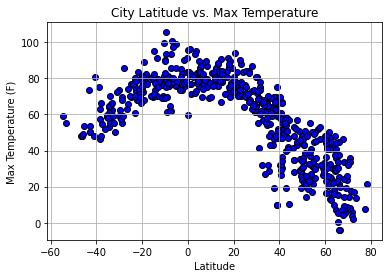

In [79]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], facecolor='blue', edgecolor="black");
plt.title('City Latitude vs. Max Temperature (10/27/20)');
plt.xlabel('Latitude');
plt.ylabel('Max Temperature (F)');
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

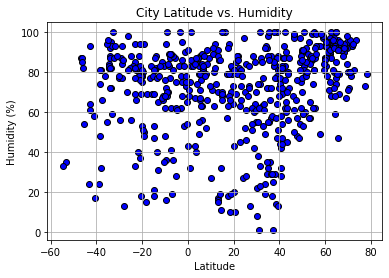

In [80]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], facecolor='blue', edgecolor="black");
plt.title('City Latitude vs. Humidity (10/27/20)');
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

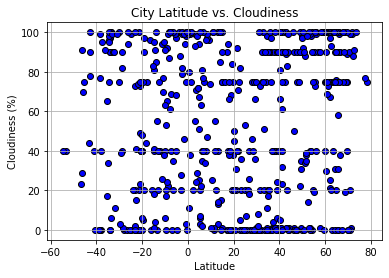

In [81]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], facecolor='blue', edgecolor="black");
plt.title('City Latitude vs. Cloudiness (10/27/20)');
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

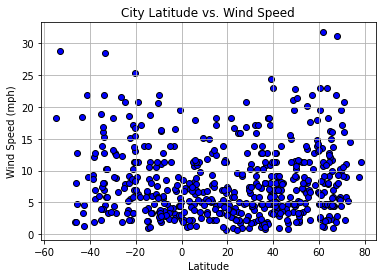

In [82]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], facecolor='blue', edgecolor="black");
plt.title('City Latitude vs. Wind Speed (10/27/20)');
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');
plt.grid()
plt.show()

## Linear Regression

In [83]:
northern_hem_city_data = city_data_humid_df.drop(city_data_df[city_data_df['Lat'] > 0].index, inplace=False)
southern_hem_city_data = city_data_humid_df.drop(city_data_df[city_data_df['Lat'] < 0].index, inplace=False)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.72754835076973


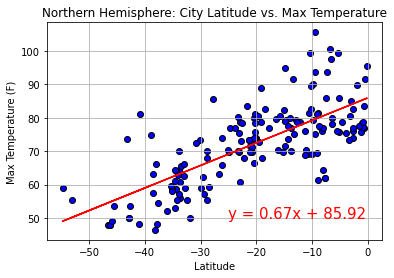

In [84]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_valuesNH = northern_hem_city_data['Lat']
y_valuesNH = northern_hem_city_data['Max Temp']
(slopeNH, interceptNH, rvalueNH, pvalueNH, stderrNH) = linregress(x_valuesNH, y_valuesNH)
regress_valuesNH = x_valuesNH * slopeNH + interceptNH

print(f'The r-value is: {rvalueNH}')

line_eqNH = "y = " + str(round(slopeNH,2)) + "x + " + str(round(interceptNH,2))

plt.scatter(x_valuesNH, y_valuesNH, facecolor='blue', edgecolor="black");
plt.plot(x_valuesNH, regress_valuesNH, "red");
plt.annotate(line_eqNH ,(-25,50),fontsize=15,color="red");
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature');
plt.xlabel('Latitude');
plt.ylabel('Max Temperature (F)');
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8688210304317449


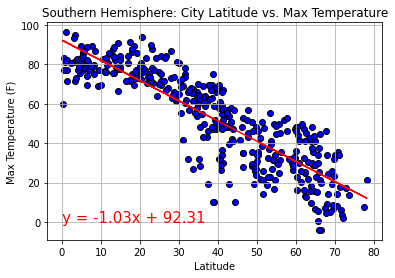

In [85]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_valuesSH = southern_hem_city_data['Lat']
y_valuesSH = southern_hem_city_data['Max Temp']
(slopeSH, interceptSH, rvalueSH, pvalueSH, stderrSH) = linregress(x_valuesSH, y_valuesSH)
regress_valuesSH = x_valuesSH * slopeSH + interceptSH

print(f'The r-value is: {rvalueSH}')

line_eqSH = "y = " + str(round(slopeSH,2)) + "x + " + str(round(interceptSH,2))

plt.scatter(x_valuesSH, y_valuesSH, facecolor='blue', edgecolor="black");
plt.plot(x_valuesSH, regress_valuesSH, "red");
plt.annotate(line_eqSH ,(0,0),fontsize=15,color="red");
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature');
plt.xlabel('Latitude');
plt.ylabel('Max Temperature (F)');
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.014885323550110928


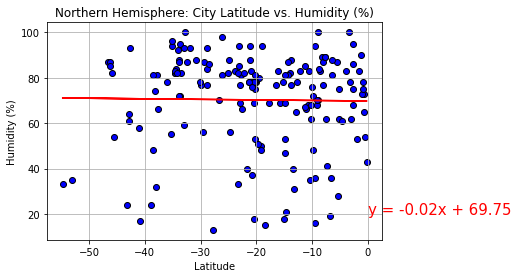

In [86]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_valuesNH2 = northern_hem_city_data['Lat']
y_valuesNH2 = northern_hem_city_data['Humidity']
(slopeNH2, interceptNH2, rvalueNH2, pvalueNH2, stderrNH2) = linregress(x_valuesNH2, y_valuesNH2)
regress_valuesNH2 = x_valuesNH2 * slopeNH2 + interceptNH2

print(f'The r-value is: {rvalueNH2}')

line_eqNH2 = "y = " + str(round(slopeNH2,2)) + "x + " + str(round(interceptNH2,2))

plt.scatter(x_valuesNH2, y_valuesNH2, facecolor='blue', edgecolor="black");
plt.plot(x_valuesNH2, regress_valuesNH2, "red");
plt.annotate(line_eqNH2 ,(0,20),fontsize=15,color="red");
plt.title('Northern Hemisphere: City Latitude vs. Humidity (%)');
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.29740190178190173


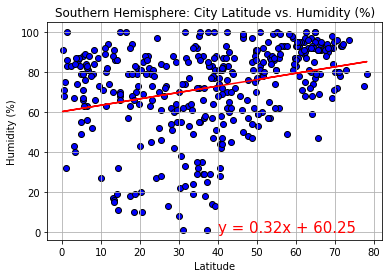

In [87]:
# Southern Hemisphere - Humidity (%)  vs. Latitude Linear Regression
x_valuesSH2 = southern_hem_city_data['Lat']
y_valuesSH2 = southern_hem_city_data['Humidity']
(slopeSH2, interceptSH2, rvalueSH2, pvalueSH2, stderrSH2) = linregress(x_valuesSH2, y_valuesSH2)
regress_valuesSH2 = x_valuesSH2 * slopeSH2 + interceptSH2

print(f'The r-value is: {rvalueSH2}')

line_eqSH2 = "y = " + str(round(slopeSH2,2)) + "x + " + str(round(interceptSH2,2))

plt.scatter(x_valuesSH2, y_valuesSH2, facecolor='blue', edgecolor="black");
plt.plot(x_valuesSH2, regress_valuesSH2, "red");
plt.annotate(line_eqSH2 ,(40,0),fontsize=15,color="red");
plt.title('Southern Hemisphere: City Latitude vs. Humidity (%)');
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05931752670821223


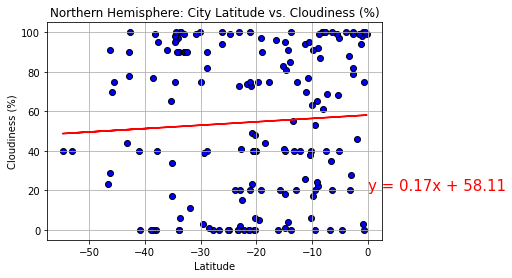

In [88]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_valuesNH3 = northern_hem_city_data['Lat']
y_valuesNH3 = northern_hem_city_data['Cloudiness']
(slopeNH3, interceptNH3, rvalueNH3, pvalueNH3, stderrNH3) = linregress(x_valuesNH3, y_valuesNH3)
regress_valuesNH3 = x_valuesNH3 * slopeNH3 + interceptNH3

print(f'The r-value is: {rvalueNH3}')

line_eqNH3 = "y = " + str(round(slopeNH3,2)) + "x + " + str(round(interceptNH3,2))

plt.scatter(x_valuesNH3, y_valuesNH3, facecolor='blue', edgecolor="black");
plt.plot(x_valuesNH3, regress_valuesNH3, "red");
plt.annotate(line_eqNH3 ,(0,20),fontsize=15,color="red");
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness (%)');
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1746040732804946


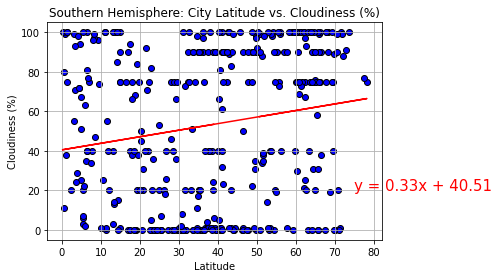

In [89]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_valuesSH3 = southern_hem_city_data['Lat']
y_valuesSH3 = southern_hem_city_data['Cloudiness']
(slopeSH3, interceptSH3, rvalueSH3, pvalueSH3, stderrSH3) = linregress(x_valuesSH3, y_valuesSH3)
regress_valuesSH3 = x_valuesSH3 * slopeSH3 + interceptSH3

print(f'The r-value is: {rvalueSH3}')

line_eqSH3 = "y = " + str(round(slopeSH3,2)) + "x + " + str(round(interceptSH3,2))

plt.scatter(x_valuesSH3, y_valuesSH3, facecolor='blue', edgecolor="black");
plt.plot(x_valuesSH3, regress_valuesSH3, "red");
plt.annotate(line_eqSH3 ,(75,20),fontsize=15,color="red");
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness (%)');
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21286218766059345


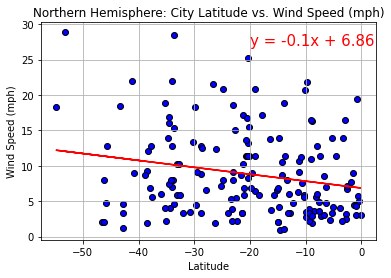

In [90]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_valuesNH4 = northern_hem_city_data['Lat']
y_valuesNH4 = northern_hem_city_data['Wind Speed']
(slopeNH4, interceptNH4, rvalueNH4, pvalueNH4, stderrNH4) = linregress(x_valuesNH4, y_valuesNH4)
regress_valuesNH4 = x_valuesNH4 * slopeNH4 + interceptNH4

print(f'The r-value is: {rvalueNH4}')

line_eqNH4 = "y = " + str(round(slopeNH4,2)) + "x + " + str(round(interceptNH4,2))

plt.scatter(x_valuesNH4, y_valuesNH4, facecolor='blue', edgecolor="black");
plt.plot(x_valuesNH4, regress_valuesNH4, "red");
plt.annotate(line_eqNH4 ,(-20,27),fontsize=15,color="red");
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed (mph)');
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.20521054948468623


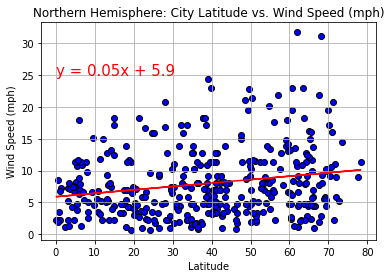

In [91]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_valuesSH4 = southern_hem_city_data['Lat']
y_valuesSH4 = southern_hem_city_data['Wind Speed']
(slopeSH4, interceptSH4, rvalueSH4, pvalueSH4, stderrSH4) = linregress(x_valuesSH4, y_valuesSH4)
regress_valuesSH4 = x_valuesSH4 * slopeSH4 + interceptSH4

print(f'The r-value is: {rvalueSH4}')

line_eqSH4 = "y = " + str(round(slopeSH4,2)) + "x + " + str(round(interceptSH4,2))

plt.scatter(x_valuesSH4, y_valuesSH4, facecolor='blue', edgecolor="black");
plt.plot(x_valuesSH4, regress_valuesSH4, "red");
plt.annotate(line_eqSH4 ,(0,25),fontsize=15,color="red");
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed (mph)');
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');
plt.grid()
plt.show()

In [ ]:
'The max temp increases the closer you get to latitude = 0 or the equator.'
'The further north or south you go, the higher the wind speed. Meaning the lower wind speeds are closer to the equator.'
'Cloudiness and humidity appear to be unaffected by the latitude, with humidity always being relatively high and cloudiness being uniformly spead out'